In [3]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\Learning Interests\\Projects\\AMR Surveillance Dashboard\\notebooks'

In [6]:
def load_yearwise_data(filepath, years, skiprows=1):
    dfs = []
    
    for year in years:
        df = pd.read_excel(filepath, sheet_name=str(year), skiprows=skiprows)

        # Check if expected columns exist
        expected_cols = ['Pathogen', 'Frequency Count', 'Percent of Total Frequency']
        if all(col in df.columns for col in expected_cols):
            df = df[expected_cols]
            df['Year'] = year
            dfs.append(df)
        else:
            print(f"Warning: Sheet for {year} does not match expected column names.")
            print("Found columns:", df.columns.tolist())

    # Combine all valid sheets
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        raise ValueError("No sheets could be loaded due to column mismatch.")


    
filepath = "C:\\Users\\HP\\Desktop\\Learning Interests\\Projects\\AMR Surveillance Dashboard\\data\\pathogen_trends\\2018-2021-adult-pathogen-distributions.xlsx"
years = [2018, 2019, 2020, 2021]

adult_yearly_df = load_yearwise_data(filepath, years)
print(adult_yearly_df.head())

                 Pathogen  Frequency Count Percent of Total Frequency  Year
0        Escherichia coli            19411                  17.314554  2018
1   Staphylococcus aureus            13566                  12.100831  2018
2   Enterococcus faecalis             8938                   7.972669  2018
3  Pseudomonas aeruginosa             8905                   7.943233  2018
4   Klebsiella pneumoniae             7208                   6.429514  2018


In [7]:
filepath = "C:\\Users\\HP\\Desktop\\Learning Interests\\Projects\\AMR Surveillance Dashboard\\data\\pathogen_trends\\2018-2021-pediatric-pathogen-distributions.xlsx"
years = [2018, 2019, 2020, 2021]

pediatric_yearly_df = load_yearwise_data(filepath, years)
print(adult_yearly_df.head())

                 Pathogen  Frequency Count Percent of Total Frequency  Year
0        Escherichia coli            19411                  17.314554  2018
1   Staphylococcus aureus            13566                  12.100831  2018
2   Enterococcus faecalis             8938                   7.972669  2018
3  Pseudomonas aeruginosa             8905                   7.943233  2018
4   Klebsiella pneumoniae             7208                   6.429514  2018


In [8]:
#Adding a popluation group column to both the dataframes
adult_yearly_df['Population Group'] = 'Adult'
pediatric_yearly_df['Population Group'] = 'Pediatric'

In [12]:
def plot_top_5_pathogens_with_yoy(df, group_label="Adult", show_plot=True, plot_change=False):
    """
    Plot top 5 pathogens by frequency over time, with optional Year-over-Year % change.

    Parameters:
        df (pd.DataFrame): Must contain 'Pathogen', 'Year', and 'Frequency Count'.
        group_label (str): Title for the plot.
        show_plot (bool): Whether to display the plot.
        plot_change (bool): If True, plots YoY % change instead of raw counts.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Step 1: Top 5 pathogens overall
    top_pathogens = (
        df.groupby('Pathogen')['Frequency Count'].sum()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    df_filtered = df[df['Pathogen'].isin(top_pathogens)].copy()

    # Step 2: Calculate % change
    if plot_change:
        df_filtered.sort_values(by=['Pathogen', 'Year'], inplace=True)
        df_filtered['YoY % Change'] = (
            df_filtered.groupby('Pathogen')['Frequency Count']
            .pct_change() * 100
        )

    # Step 3: Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    if plot_change:
        sns.lineplot(data=df_filtered, x='Year', y='YoY % Change', hue='Pathogen', marker='o', ax=ax)
        ax.set_ylabel("Year-over-Year % Change")
        ax.set_title(f"YoY Change in Resistance Frequency (Top 5 Pathogens – {group_label})")
    else:
        sns.lineplot(data=df_filtered, x='Year', y='Frequency Count', hue='Pathogen', marker='o', ax=ax)
        ax.set_ylabel("Frequency Count")
        ax.set_title(f"Top 5 Resistant Pathogens ({group_label})")

    ax.set_xlabel("Year")
    ax.legend(title="Pathogen")
    ax.grid(True)
    plt.tight_layout()

    if show_plot:
        plt.show()
    else:
        return fig, ax


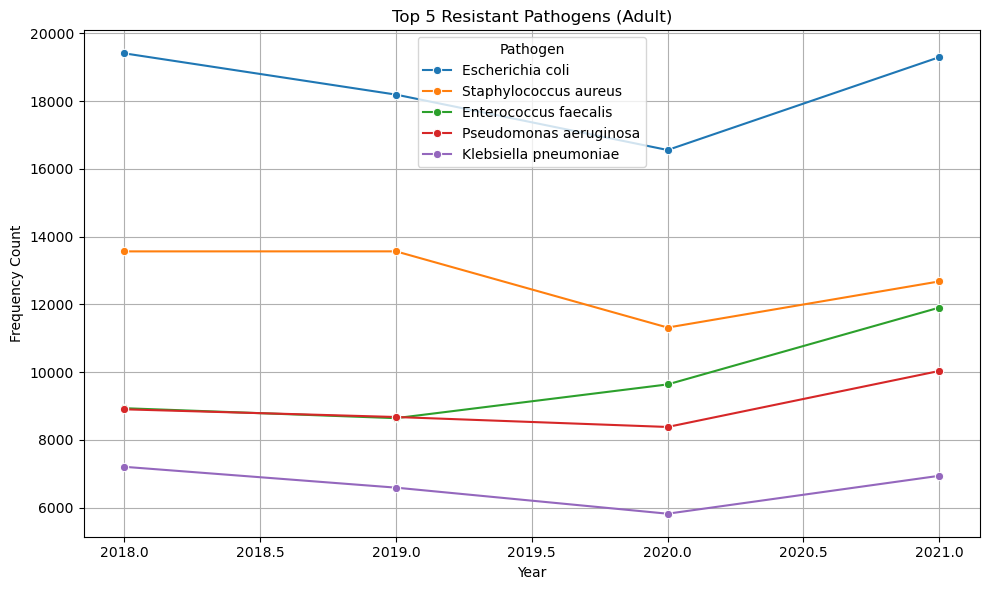

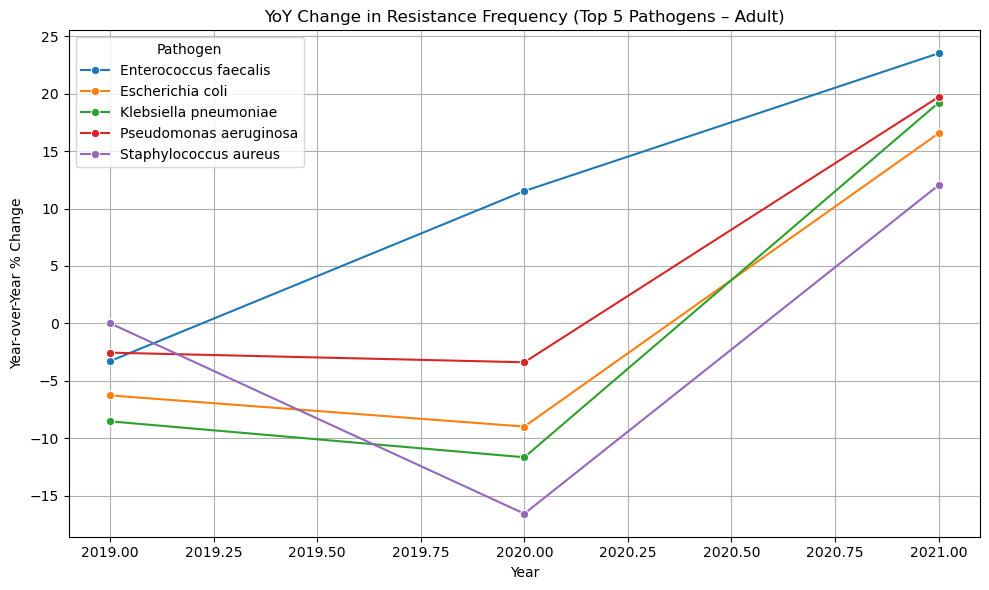

In [13]:
# Plot raw frequency
plot_top_5_pathogens_with_yoy(adult_yearly_df, group_label="Adult")

# Plot % change trend
plot_top_5_pathogens_with_yoy(adult_yearly_df, group_label="Adult", plot_change=True)


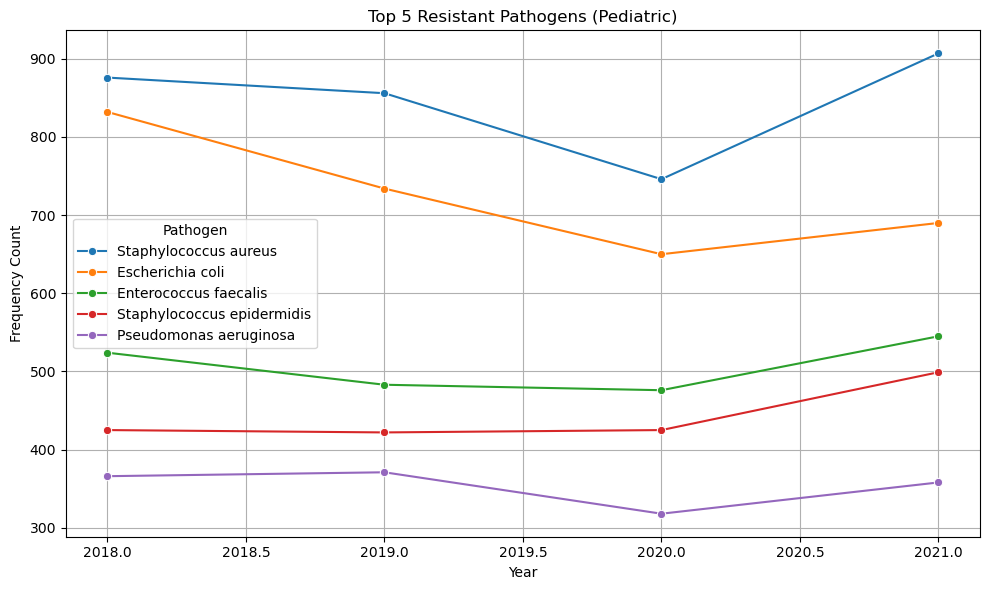

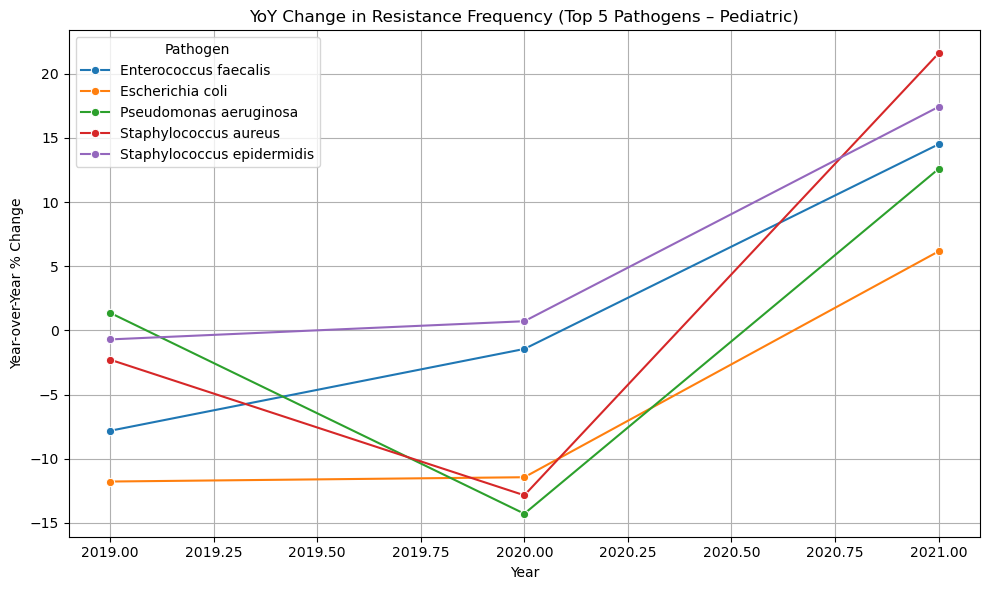

In [14]:
# Plot raw frequency
plot_top_5_pathogens_with_yoy(pediatric_yearly_df, group_label="Pediatric")

# Plot % change trend
plot_top_5_pathogens_with_yoy(pediatric_yearly_df, group_label="Pediatric", plot_change=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_yoy_change_side_by_side(adult_df, pediatric_df):
    """
    Plots YoY % change in resistance frequency for top 5 pathogens in adults and pediatrics side-by-side.
    """
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    for i, (df, label, ax) in enumerate(zip([adult_df, pediatric_df], ['Adult', 'Pediatric'], axs)):
        # Get top 5 pathogens by total frequency
        top_pathogens = (
            df.groupby('Pathogen')['Frequency Count']
            .sum().sort_values(ascending=False).head(5).index
        )
        df_filtered = df[df['Pathogen'].isin(top_pathogens)].copy()
        df_filtered.sort_values(by=['Pathogen', 'Year'], inplace=True)

        # Calculate YoY % change
        df_filtered['YoY % Change'] = (
            df_filtered.groupby('Pathogen')['Frequency Count']
            .pct_change() * 100
        )

        # Plot
        sns.lineplot(data=df_filtered, x='Year', y='YoY % Change', hue='Pathogen', marker='o', ax=ax)
        ax.set_title(f"YoY % Change in Resistance (Top 5 Pathogens – {label})")
        ax.set_xlabel("Year")
        ax.grid(True)
        if i == 0:
            ax.set_ylabel("Year-over-Year % Change")
        else:
            ax.set_ylabel("")
        ax.legend(title="Pathogen")

    plt.tight_layout()
    plt.show()


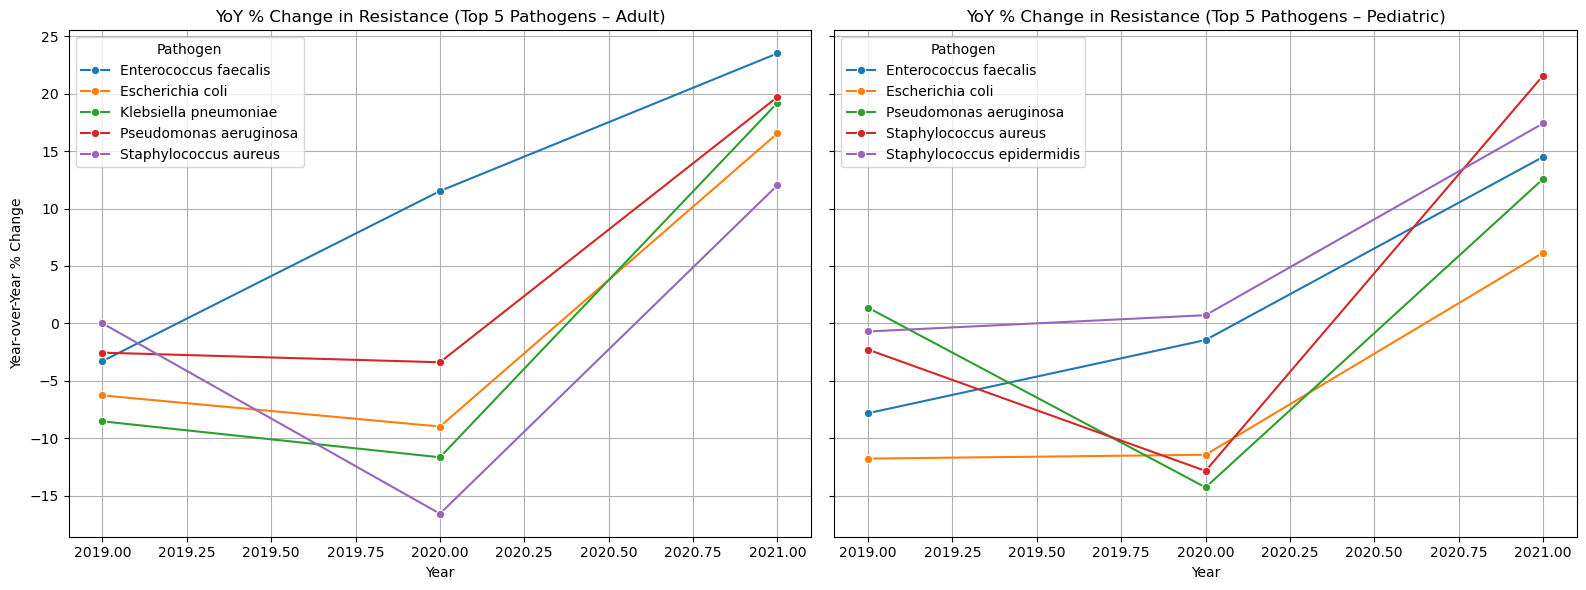

In [16]:
plot_yoy_change_side_by_side(adult_yearly_df, pediatric_yearly_df)


In [23]:
import matplotlib.pyplot as plt

def plot_cumulative_and_share_side_by_side(adult_df, pediatric_df):
    """
    Creates a 2x2 grid of plots:
    - Top row: Cumulative resistance burden (adult & pediatric)
    - Bottom row: Pathogen resistance share over time (adult & pediatric)
    """
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))

    for i, (df, label) in enumerate(zip([adult_df, pediatric_df], ['Adult', 'Pediatric'])):
        # Step 1: Top 5 pathogens overall
        top_pathogens = df.groupby('Pathogen')['Frequency Count'].sum().nlargest(5).index
        df_filtered = df[df['Pathogen'].isin(top_pathogens)]

        # --- Top Row: Cumulative Burden ---
        cumulative = df_filtered.groupby('Pathogen')['Frequency Count'].sum().sort_values(ascending=False)
        axs[0, i].bar(cumulative.index, cumulative.values, color='skyblue')
        axs[0, i].set_title(f"Cumulative Resistance Burden – {label}")
        axs[0, i].set_ylabel("Total Frequency (2018–2021)")
        axs[0, i].set_xlabel("Pathogen")
        axs[0, i].grid(axis='y')

        # --- Bottom Row: Percent Share Area Plot ---
        area_df = df_filtered.groupby(['Year', 'Pathogen'])['Frequency Count'].sum().reset_index()
        area_df['Total'] = area_df.groupby('Year')['Frequency Count'].transform('sum')
        area_df['Percent Share'] = area_df['Frequency Count'] / area_df['Total'] * 100
        area_pivot = area_df.pivot(index='Year', columns='Pathogen', values='Percent Share').fillna(0)

        area_pivot.plot.area(ax=axs[1, i], stacked=True, cmap='tab10')
        axs[1, i].set_title(f"Pathogen Resistance Share Over Time – {label}")
        axs[1, i].set_ylabel("Percentage of Total Resistance")
        axs[1, i].set_xlabel("Year")
        axs[1, i].legend(title="Pathogen", bbox_to_anchor=(1.05, 1), loc='upper left')
        axs[1, i].grid(True)

    plt.tight_layout()
    plt.show()
    return fig


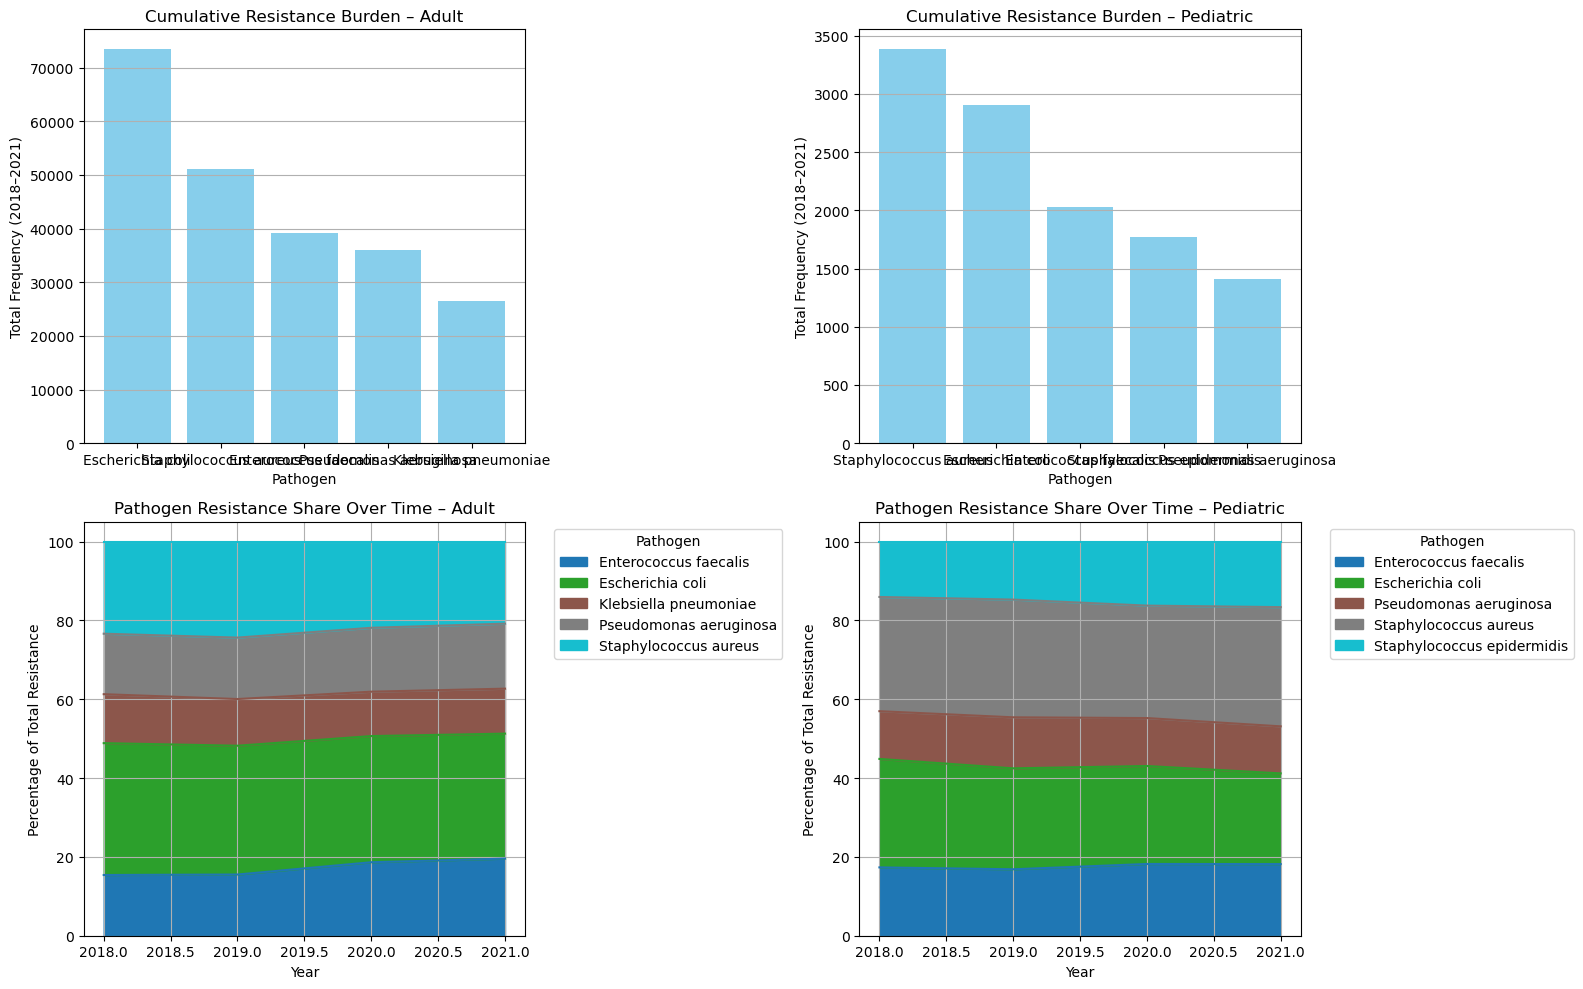

In [24]:
plot_cumulative_and_share_side_by_side(adult_yearly_df, pediatric_yearly_df)
